In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = '/content/drive/MyDrive/Colab Notebooks/New.zip'
extract_path = '/content/drive/MyDrive/Colab Notebooks/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/Colab Notebooks/New/train/'
test_dir = '/content/drive/MyDrive/Colab Notebooks/New/test/'

# ImageDataGenerator for loading
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.15)  # Using 20% of the data for validation

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Found 2040 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


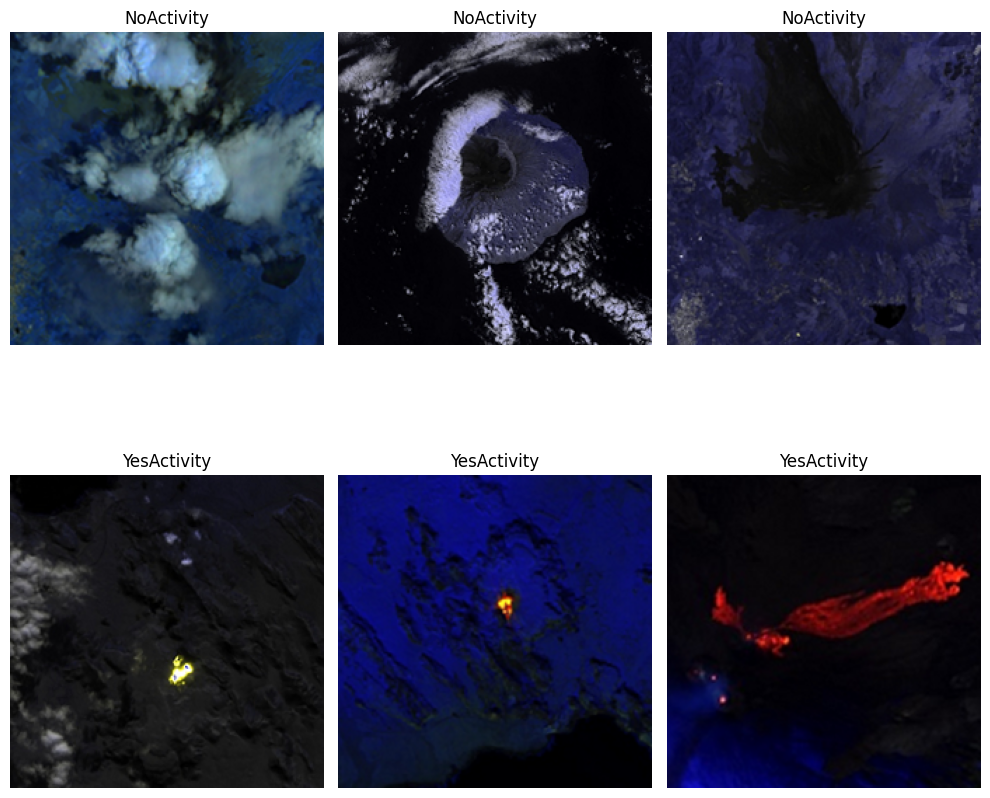

In [ ]:
import numpy as np

# Get class labels and indices
class_labels = train_generator.class_indices
class_names = list(class_labels.keys())
num_classes = len(class_names)

# Display a few images from each class
num_images_per_class = 3

plt.figure(figsize=(10, 10))

# Iterate through each class
for i, class_name in enumerate(class_names):
    images_found = 0
    for j in range(len(train_generator)):
        batch = train_generator[j]
        batch_class_indices = np.argmax(batch[1], axis=1)  # Get the indices of classes in the batch
        class_indices_in_batch = np.where(batch_class_indices == class_labels[class_name])[0]  # Find indices of images belonging to the current class

        for idx in class_indices_in_batch:
            plt.subplot(num_classes, num_images_per_class, i * num_images_per_class + images_found + 1)
            img = batch[0][idx]  # Get the image from the batch
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')

            images_found += 1
            if images_found >= num_images_per_class:
                break
        if images_found >= num_images_per_class:
            break

plt.tight_layout()
plt.show()


In [ ]:
model = Sequential([
    Conv2D(256, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

from tensorflow.keras.optimizers import Adam
# Define the optimizer with a custom learning rate
optimizer = Adam()

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 256)     0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      147520    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 128)      

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10)


Epoch 1/10
63/63 [==============================] - 24s 339ms/step - loss: 0.2477 - accuracy: 0.9193 - val_loss: 0.3695 - val_accuracy: 0.8920
Epoch 2/10
63/63 [==============================] - 19s 294ms/step - loss: 0.0378 - accuracy: 0.9851 - val_loss: 0.0626 - val_accuracy: 0.9659
Epoch 3/10
63/63 [==============================] - 19s 308ms/step - loss: 0.0413 - accuracy: 0.9895 - val_loss: 0.0932 - val_accuracy: 0.9432
Epoch 4/10
63/63 [==============================] - 19s 300ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 5/10
63/63 [==============================] - 23s 360ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 6/10
63/63 [==============================] - 19s 295ms/step - loss: 0.0077 - accuracy: 0.9975 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 7/10
63/63 [==============================] - 22s 349ms/step - loss: 0.0297 - accuracy: 0.9935 - val_loss: 0.0011 - val_accuracy: 1.0000

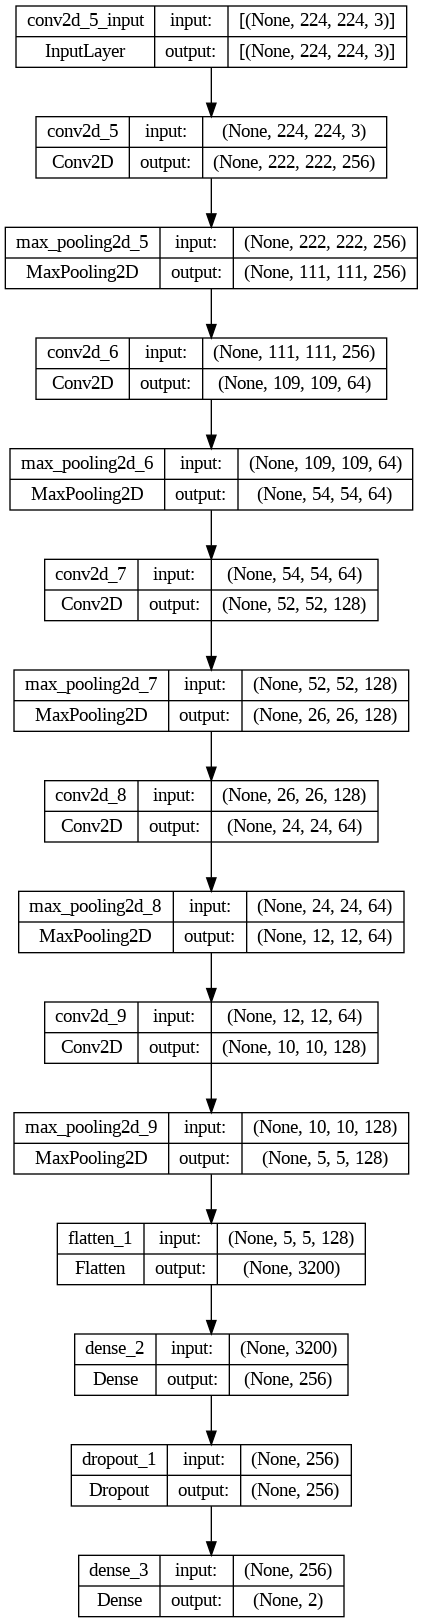

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)


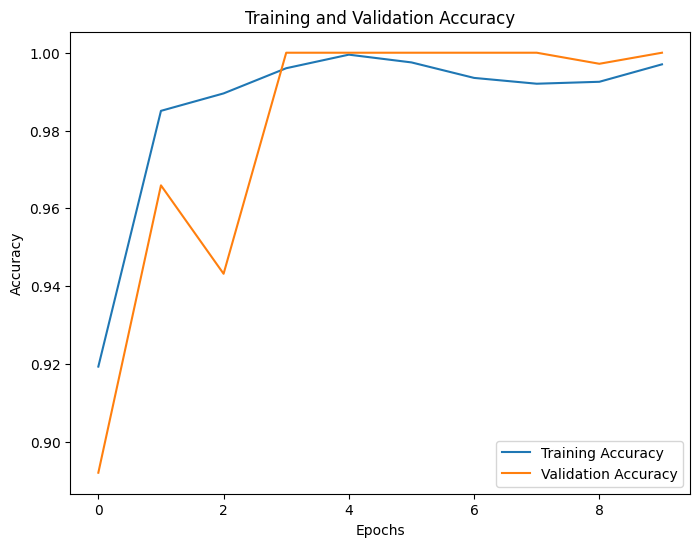

In [ ]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

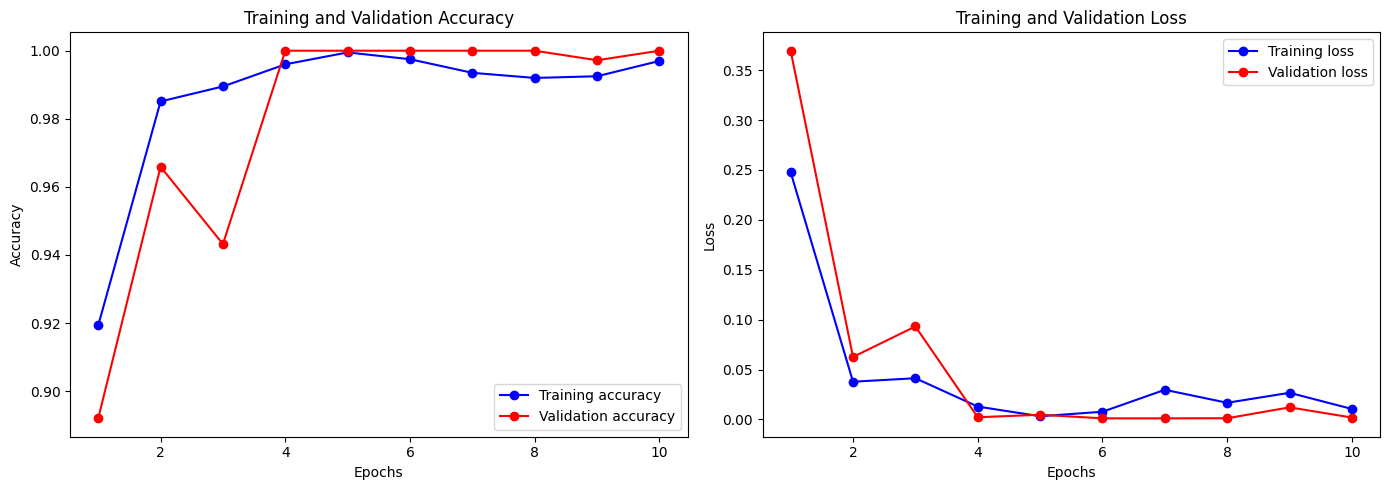

19/19 [==============================] - 5s 255ms/step
Accuracy: 0.9933
Precision: 1.0000
Recall: 0.9867
F1-score: 0.9933
Confusion Matrix
[[300   0]
 [  4 296]]
Classification Report
              precision    recall  f1-score   support

  NoActivity       0.99      1.00      0.99       300
 YesActivity       1.00      0.99      0.99       300

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



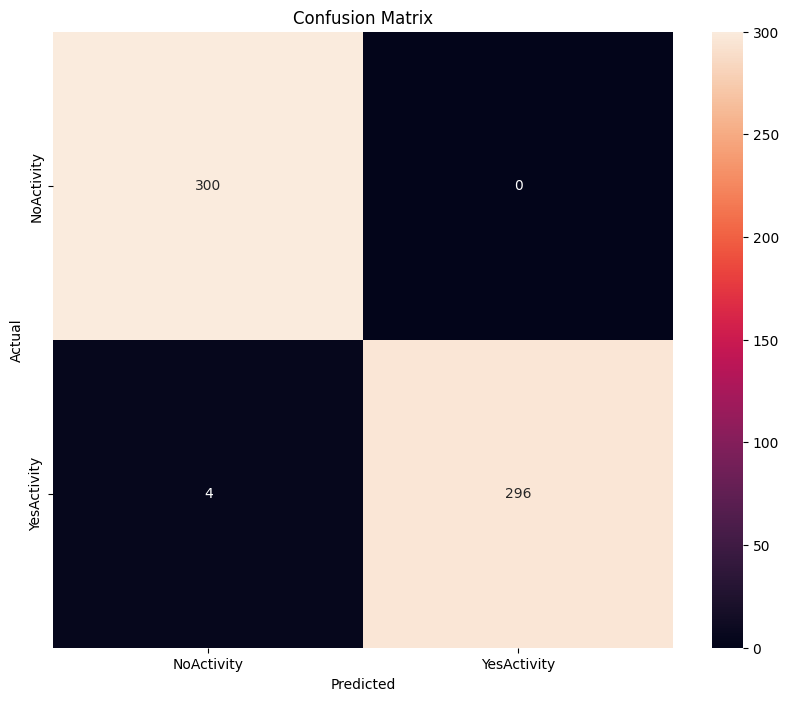

In [ ]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model
test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)



accuracy = accuracy_score(test_generator.classes, y_pred)
precision = precision_score(test_generator.classes, y_pred)
recall = recall_score(test_generator.classes, y_pred)
f1 = f1_score(test_generator.classes, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Confusion matrix and classification report
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)
cm_plot_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()